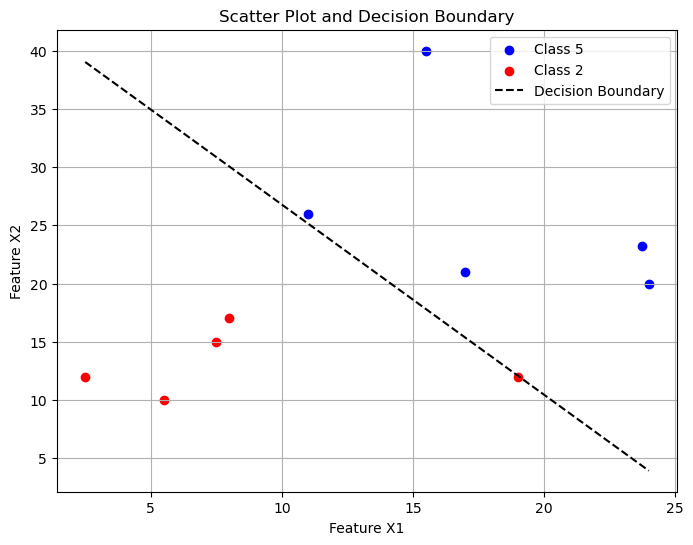

In [13]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[15.5, 40],
              [23.75, 23.25],
              [8, 17],
              [17, 21],
              [5.5, 10],
              [19, 12],
              [24, 20],
              [2.5, 12],
              [7.5, 15],
              [11, 26]])

y = np.array([5, 5, 2, 5, 2, 2, 5, 2, 2, 5])

# Normalize X between 0 and 1
X_min = X.min(axis=0)
X_max = X.max(axis=0)
X_norm = (X - X_min) / (X_max - X_min)

# Normalize y to +1 and -1
y_norm = np.where(y == 5, 1, -1)

# Perceptron Algorithm
def perceptron(X, y, learning_rate=0.1, epochs=1000):
    weights = np.zeros(X.shape[1])
    bias = 0
    
    for epoch in range(epochs):
        for i in range(len(X)):
            activation = np.dot(X[i], weights) + bias
            
            # Update weights and bias if misclassified
            if y[i] * activation <= 0:
                weights += learning_rate * y[i] * X[i]
                bias += learning_rate * y[i]
    
    return weights, bias

weights, bias = perceptron(X_norm, y_norm)

# Decision boundary
# Solve for w1*x1 + w2*x2 + b = 0 => x2 = -(w1*x1 + b)/w2
x1_test = np.linspace(0, 1, 100)
x2_test = -(weights[0] * x1_test + bias) / weights[1]

# Recover the original data
X_orig = X_min + X_norm * (X_max - X_min)

# Plot
plt.figure(figsize=(8, 6))

plt.scatter(X_orig[y == 5][:, 0], X_orig[y == 5][:, 1], color='blue', label='Class 5', marker='o')
plt.scatter(X_orig[y == 2][:, 0], X_orig[y == 2][:, 1], color='red', label='Class 2', marker='o')

plt.plot(x1_test * (X_max[0] - X_min[0]) + X_min[0], x2_test * (X_max[1] - X_min[1]) + X_min[1], 'k--', label='Decision Boundary')

plt.title('Scatter Plot and Decision Boundary')
plt.xlabel('Feature X1')
plt.ylabel('Feature X2')
plt.legend()
plt.grid(True)
plt.show()